<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression Review Lab

_Authors: Alexander Combs (NYC)_

---

In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [4]:
X = range(1,11)
Y = [.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]

In [8]:
my_dict = dict(zip(X,Y))

In [2]:
# A:

### Using that dictionary, create a pandas DataFrame and call it pre_df

In [14]:
pre_df = pd.DataFrame(my_dict.items(),columns=['X','Y'])

In [15]:
pre_df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [16]:
X_ten = pre_df['X'] + 10

In [18]:
Y_three = pre_df['Y'] + 3

In [25]:
new_df = pd.DataFrame(list(zip(X_ten,Y_three)), columns = ['X','Y'])

In [4]:
# A:

### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [95]:
df = pd.concat([pre_df, new_df], ignore_index=True)

In [5]:
# A:

### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

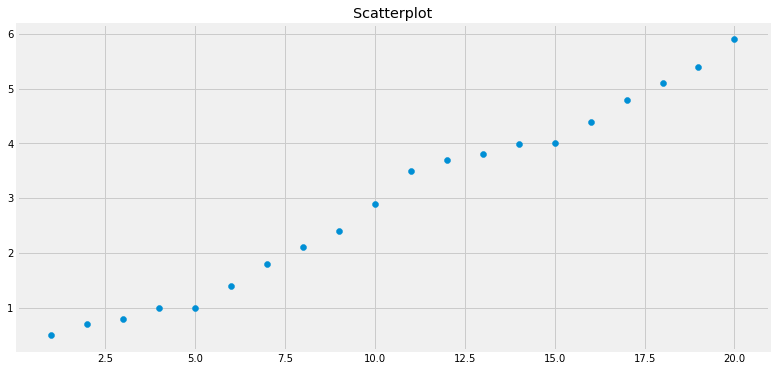

In [75]:
plt.figure(figsize=(12,6))
plt.title('Scatterplot')
plt.scatter(df['X'],df['Y'])

In [6]:
# A:

### Using statsmodels, fit an OLS regression to your data and print our the summary

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()

In [79]:
feature_cols = ['X']
X = df[feature_cols]
y = df.Y

In [67]:
X = df['X']
y = df['Y']

In [80]:
type(X)

pandas.core.frame.DataFrame

In [81]:
type(y)

pandas.core.series.Series

In [82]:
X.shape

(20, 1)

In [83]:
y.shape

(20,)

In [84]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
lr.intercept_

-0.08568421052631647

In [86]:
lr.coef_

array([0.28996992])

## Using the model you fitted, answer the folowing questions:

### What is the R-squared for the model?

In [96]:
lr.score(df[['X']],df['Y'])

0.9860390205423032

### What is the intercept?

In [90]:
lr.intercept_

-0.08568421052631647

### Using the above, write the equation for our model

In [92]:
lr.coef_ * X + lr.intercept_

,X
0,0.204286
1,0.494256
2,0.784226
3,1.074195
4,1.364165
5,1.654135
6,1.944105
7,2.234075
8,2.524045
9,2.814015


In [97]:
print(str(lr.coef_) + str(lr.intercept_))

[0.28996992]-0.08568421052631647


### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [93]:
lr.coef_ * 20 + lr.intercept_

array([5.71371429])

In [94]:
lr.coef_ * 21 + lr.intercept_

array([6.00368421])

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [98]:
lr.predict(np.array([[20],[21]]))

array([5.71371429, 6.00368421])

### Get the SSE by using the predictions for every X (y_hats) and the true y values

In [15]:
# A:

### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

In [103]:
lr.predict(df[['X']])

array([0.20428571, 0.49425564, 0.78422556, 1.07419549, 1.36416541,
       1.65413534, 1.94410526, 2.23407519, 2.52404511, 2.81401504,
       3.10398496, 3.39395489, 3.68392481, 3.97389474, 4.26386466,
       4.55383459, 4.84380451, 5.13377444, 5.42374436, 5.71371429])

In [104]:
df.X

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: X, dtype: int64

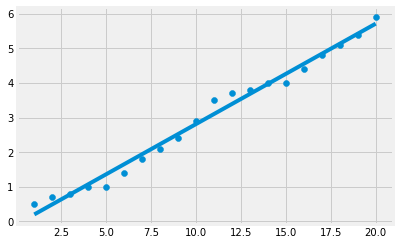

In [100]:
plt.scatter(df.X, df.Y)
plt.plot(df.X,lr.predict(df[['X']]))

In [16]:
# A:

### Import PolynomialFeatures from sklearn. Then do the following:

- Instantiate a PolynomialFeatures object and save it as poly
- Documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Use degree=5 (Hint: If that gives you more than 6 columns, you forgot to remove something)
- Use fit_transform on X to create a numpy array of polynomial features
- Save that array as poly_feats
- Convert this array to a DataFrame and save it as poly_X
- Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)
- Save this joined index as pdf

In [105]:
from sklearn.preprocessing import PolynomialFeatures

In [106]:
feats = PolynomialFeatures(degree=5)

In [108]:
poly_feats = feats.fit_transform(df[['X']])

In [109]:
poly_X = pd.DataFrame(poly_feats)

In [111]:
poly_X.head()

,0,1,2,3,4,5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0,32.0
2,1.0,3.0,9.0,27.0,81.0,243.0
3,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.0,5.0,25.0,125.0,625.0,3125.0


In [113]:
pdf = pd.merge(df, poly_X, on = df.index)

In [115]:
pdf.head()

,key_0,X,Y,0,1,2,3,4,5
0,0,1,0.50,1.0,1.0,1.0,1.0,1.0,1.0
1,1,2,0.70,1.0,2.0,4.0,8.0,16.0,32.0
2,2,3,0.80,1.0,3.0,9.0,27.0,81.0,243.0
3,3,4,0.99,1.0,4.0,16.0,64.0,256.0,1024.0
4,4,5,1.00,1.0,5.0,25.0,125.0,625.0,3125.0


In [116]:
X = pdf[['X']]
Y = pdf.Y

In [117]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Using statsmodels as before, fit this new model and save it as poly_results

In [20]:
# A:

### Print out the model's predictions and save them as poly_yhat

In [121]:
poly_yhat = lr.predict(X)

### Calculate the SSE

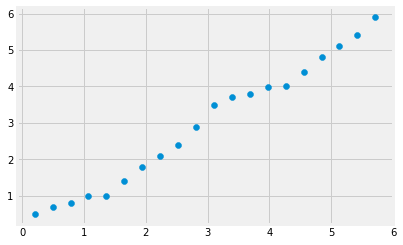

In [124]:
plt.scatter(poly_yhat, pdf['Y'])

In [22]:
# A:

### Now, create a for loop that does the follow:

- Iterates over the following alpha values [0, .001, .01, .25, .5, 1, 10]
- In each loop, you are going to fit a regularized regression
- See [Statsmodels Docs](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html) to understand how to do this
- In each loop, set the value of alpha to the value of being iterated over
- Set the L1_wt parameter to 0
- In each loop print out the alpha value, the SSE, and the mean absolute value of the coefficient of the model
- You should also print out the predictions as a line and the true y's as a scatterplot as above

In [23]:
# A:

### Using the output of the above, answer the following:
- What happens to the SSE over the increasing alpha values?
- What happens to the mean abs. value of the coefficients?
- Does increasing the bias to reduce variance always mean a better model?

In [24]:
# A:

In [25]:
# A:

In [26]:
# A: